<a href="https://colab.research.google.com/github/martavillagran/martavillagran.github.io/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pruebas


### **Prueba para comprobar el truco de la matriz identidad**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Datos del mnist
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Parameters
max_layers = 7
max_layers_2train = 3
num_max_units = 54
input_dim = 28

In [ ]:
def build_model(max_layers):
  # Comprobaciones de la identidad tipo resnet (fijo las tres primeras capas y el resto no las entreno)
  inputs = keras.Input(shape=(input_dim, input_dim), name="digits")

  for layers in range(max_layers):
    if layers == 0:
      x = keras.layers.Flatten()(inputs)
    else:
      if layers > 3:  
        x = keras.layers.Dense(num_max_units, trainable=False, kernel_initializer=tf.keras.initializers.Identity())(x)
      else:
        x = keras.layers.Dense(num_max_units, activation="sigmoid")(x)

  outputs = keras.layers.Dense(len(np.unique(train_labels)), activation="softmax", name="classification")(x)
  return  keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model1 = build_model(7)

NameError: ignored

In [ ]:
model1.summary()

In [ ]:
model2 = build_model(4)

In [ ]:
model2.summary()

In [ ]:
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
np.random.seed(19)
tf.random.set_seed(41)
history = model1.fit(train_images, train_labels, epochs=100, batch_size=512, shuffle=False)

In [ ]:
model1.predict(test_images[0:1])

# Planteamiento

#### Con Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# Datos del mnist
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Parameters
max_layers = 6
max_layers_2train = 2
num_max_units = 54
input_dim = 28
trigger_thr = 0.025

In [ ]:
def build_model(max_layers, max_layers2train):
  # Comprobaciones de la identidad tipo resnet (fijo las tres primeras capas y el resto no las entreno)
  inputs = keras.Input(shape=(input_dim**2,), name="digits")

  for layers in range(max_layers):
    if layers == 0:
      x = keras.layers.Dense(num_max_units, activation="relu", name="layer%s" %layers, kernel_constraint=FreezeSlice([1],np.s_[0]))(inputs)
    else:
      if layers > max_layers2train:  
        x = keras.layers.Dense(num_max_units, trainable=False,  name="layer%s" %layers, 
                               kernel_initializer=tf.keras.initializers.Identity())(x)
      else:
        x = keras.layers.Dense(num_max_units,  name="layer%s" %layers, activation="relu")(x)

  outputs = keras.layers.Dense(len(np.unique(train_labels)), activation="softmax", name="classification")(x)
  return  keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model = build_model(max_layers, max_layers_2train)

NameError: ignored

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
layer0 (Dense)               (None, 54)                42390     
_________________________________________________________________
layer1 (Dense)               (None, 54)                2970      
_________________________________________________________________
layer2 (Dense)               (None, 54)                2970      
_________________________________________________________________
layer3 (Dense)               (None, 54)                2970      
_________________________________________________________________
layer4 (Dense)               (None, 54)                2970      
_________________________________________________________________
layer5 (Dense)               (None, 54)                2970

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# Prepare the training dataset
batch_size = 512
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

In [ ]:
# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [ ]:
# Instantiate an optimizer.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)
    return loss_value

In [ ]:
trigger_thr = 0.25

In [ ]:
def get_non_trainable_layers(model, max_layers):
  non_trainable = np.zeros(max_layers)
  for i in range(max_layers):
    if model.get_layer("layer%s" %i).trainable == 0:
      non_trainable[i] = 1
  return non_trainable

In [ ]:
non_trainabale_layers = get_non_trainable_layers(model, max_layers)

In [ ]:
# Trainable weigths para hacer la mascara y el dropout
# No sirve lo anterior, el modelo no se compila, hacerlo con early stopping
# https://github.com/keras-team/keras/issues/2880 - para darle freeze

array([0., 0., 0., 1., 1., 1.])

In [ ]:
w1 = model.get_layer('layer0').get_weigths()[0]

AttributeError: ignored

In [ ]:
# Custom training loop
epochs = 10

for epoch in range(epochs):
  # Iterate over the batches of the dataset.
    loss_prev = loss_value
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        loss_value = train_step(x_batch_train, y_batch_train)
    
    if epoch == 0:
      loss_prev = loss_value
    if np.abs((loss_prev - loss_value)/loss_prev) > trigger_thr:
      # GA optimization ex
      hidden_layers = 4
      non_trainabale_layers = get_non_trainable_layers(model, max_layers)
      while (max_layers - np.sum(non_trainabale_layers)) < hidden_layers:
        print('Trigger')
        idx = np.where(non_trainabale_layers>0)[0]
        non_trainabale_layers[idx[0]] = 0
        model.get_layer("layer%s" %idx[0]).trainable = True
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') # ojo que sino no hace nada
        
   
    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))
     # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

Training acc over epoch: 0.8779
Training acc over epoch: 0.8813
Training acc over epoch: 0.8869
Training acc over epoch: 0.8920
Training acc over epoch: 0.8947
Training acc over epoch: 0.8969
Training acc over epoch: 0.8993
Training acc over epoch: 0.9020
Training acc over epoch: 0.9039
Training acc over epoch: 0.9062


In [ ]:
non_trainabale_layers = get_non_trainable_layers(model, max_layers)
non_trainabale_layers

array([0., 0., 0., 0., 1., 1.])

In [ ]:
w3 = model.get_layer('layer0')


In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(w3.get_weights()[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,-0.040816,0.034933,0.071282,-0.005608,0.012143,0.036048,0.077783,0.037841,0.014904,0.082379,-0.000381,0.069258,-0.020570,0.000968,0.015307,0.064013,-0.077571,-0.006489,-0.019111,0.037761,-0.032844,-0.041544,-0.055568,-0.074368,0.023561,-0.081544,0.018014,0.064763,0.045914,0.038636,-0.079743,0.036667,0.015317,-0.021623,0.083662,0.055733,0.048132,-0.025575,-0.014567,0.038181,-0.047241,0.014633,0.082796,-0.013425,-0.050871,0.001069,-0.042327,-0.073835,0.035631,0.064500,0.065276,0.068856,-0.064112,0.065959
1,0.050813,0.004208,-0.083369,-0.072771,0.040086,0.053143,0.023650,-0.017038,0.021519,-0.023179,-0.054561,0.043894,-0.082774,-0.002985,-0.027646,-0.010465,-0.024704,0.077425,0.069002,0.033896,0.068864,-0.002189,0.008090,0.043587,0.069004,-0.058721,-0.058498,0.056573,-0.022667,0.040349,-0.034662,-0.027642,-0.050791,-0.013329,-0.019086,-0.051741,0.036200,-0.003845,0.077286,0.038562,-0.074627,-0.074661,0.018292,-0.049099,-0.049046,-0.011546,-0.023001,-0.014542,0.014810,0.071854,0.028379,-0.014995,-0.033035,0.010024
2,0.066511,-0.063230,0.060301,-0.022914,0.019500,-0.018194,-0.049797,-0.007767,0.052476,0.075698,0.052329,-0.028242,-0.084026,-0.026509,-0.030610,0.048289,0.025827,0.059023,0.062186,-0.055522,0.015328,0.023914,0.014982,0.060698,-0.036607,0.060766,0.068325,-0.036000,0.044746,-0.045154,0.051430,-0.055435,0.035434,0.073502,-0.079585,0.082807,0.022626,0.030297,0.021089,-0.081252,-0.030687,0.038162,0.018953,-0.056651,0.039238,-0.013250,0.053461,-0.057019,0.067539,-0.036395,0.029410,-0.082958,-0.016458,0.010619
3,0.022178,-0.021026,-0.082399,-0.070535,0.019096,-0.005691,-0.053594,0.027403,0.039142,0.038024,-0.078203,0.079007,-0.074097,0.032382,-0.043261,-0.020954,-0.071257,-0.067479,0.023143,0.050282,-0.004035,0.065023,0.035802,0.066714,-0.018054,-0.006602,0.046304,0.020962,-0.020979,0.037289,-0.042101,-0.058693,-0.045718,-0.022028,-0.068745,-0.008206,-0.030656,-0.049251,-0.083461,0.029621,-0.008434,0.069664,-0.081643,-0.011234,-0.061039,-0.081420,-0.044808,-0.031347,-0.037301,-0.071862,-0.062580,0.053458,-0.049285,0.007102
4,0.056877,-0.083174,-0.018631,0.037361,-0.028160,0.072845,0.069202,-0.026534,-0.017204,0.046108,0.002416,0.019517,-0.082398,-0.012950,0.024216,-0.051724,0.076221,-0.070663,-0.068563,0.067489,0.045596,-0.024708,0.044227,0.040457,-0.030351,0.072548,-0.011113,0.042733,0.047204,-0.004216,-0.005111,-0.055785,-0.044020,-0.040617,-0.072027,-0.007951,0.064382,-0.075824,-0.019558,-0.056610,0.002980,0.078838,0.082166,0.010410,-0.037415,-0.040607,0.035714,-0.067893,-0.074733,0.046354,-0.084028,0.052057,-0.039099,-0.079448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.032553,0.073165,-0.074960,0.035447,0.072694,-0.015046,0.050601,-0.050443,-0.058342,-0.025527,0.012865,-0.063225,0.042553,-0.006569,0.069413,0.065219,0.003376,-0.076669,-0.055099,-0.009938,-0.075990,-0.022195,-0.029973,0.053166,-0.073553,-0.019086,0.035778,-0.002784,0.068967,0.080992,-0.076994,0.000833,0.079333,0.004919,-0.076813,0.075796,-0.048707,0.016452,-0.018926,-0.068866,0.005920,-0.046256,0.021791,0.054079,0.019203,-0.028588,0.061442,-0.008230,-0.001006,-0.037633,-0.000933,0.059720,0.013516,-0.067722
780,0.031789,0.061051,0.024838,-0.054059,0.083717,-0.020930,0.020352,0.000282,-0.052710,0.030490,-0.025399,-0.013316,-0.051764,0.056875,0.049697,-0.083116,-0.025027,-0.059617,-0.030312,-0.071241,0.075783,0.005492,0.027992,-0.053718,-0.052705,-0.080325,0.003682,0.016135,-0.038168,0.040071,0.082938,-0.057800,-0.009995,0.002813,0.079940,0.052179,0.007601,0.076367,0.012326,0.070553,0.047625,-0.077731,0.062256,0.001734,0.059669,0.055450,0.010006,-0.012430,0.063227,-0.067751,0.053841,0.035348,-0.045475,-0.078142
781,-0.015362,-0.

In [ ]:
from keras.initializers import Initializer

class FixSlice(Initializer):
    """
    Initializer which forces a certain slice to be chosen values

    INPUTS:

    values - An object which can be converted into a numpy ndarray. These are
             the pre-chosen values. When using this initializer, the user should
             ensure that the dtype of values can be converted to the desired
             dtype of the weight tensor.

    slice - A slice or tuple of slices (it is recommended to use numpy.s_ to
            specify this parameter). This specifies which entries should be
            filled with the pre-chosen values. When using this initializer,
            the user should ensure that the slice object "fits inside" the shape
            of the tensor to be initialized, and that the resulting slice of the
            tensor has the same shape as the values ndarray.

    backup - An initializer instance. The remaining values are filled using this
             initializer.
    """
    def __init__(self, values, slice, backup="glorot_uniform"):
        if hasattr(values, "numpy"):
            self.values = values.numpy()
        elif isinstance(values, np.ndarray):
            self.values = values
        else:
            try:
                self.values = values.to_numpy()
            except:
                self.values = np.array(values)

        self.values = values
        self.slice = slice
        self.backup = initializers.get(backup)

    def __call__(self, shape, dtype=None):
        result = self.backup(shape, dtype=dtype).numpy()
        result[self.slice] = self.values
        return tf.Variable(result)

In [ ]:
from keras.constraints import Constraint

class FreezeSlice(Constraint):
    """
    Constraint which keeps a certain slice frozen at chosen values

    INPUTS:

    values - An object which can be converted into a numpy ndarray. These are
             the pre-chosen values. When using this constraint, the user should
             ensure that the dtype of values can be converted to the desired
             dtype of the weight tensor.

    slice - A slice or tuple of slices (it is recommended to use numpy.s_ to
            specify this parameter). This specifies which entries should be
            filled with the pre-chosen values. When using this initializer,
            the user should ensure that the slice object "fits inside" the shape
            of the tensor to be initialized, and that the resulting slice of the
            tensor has the same shape as the values ndarray.
    """
    def __init__(self, values, slice):
        if hasattr(values, "numpy"):
            self.values = values.numpy()
        elif isinstance(values, np.ndarray):
            self.values = values
        else:
            try:
                self.values = values.to_numpy()
            except:
                self.values = np.array(values)

        self.values = values
        self.slice = slice

    def __call__(self, w):
        zs = np.zeros(w.shape)
        zs[self.slice] = self.values
        os = np.ones(w.shape)
        os[self.slice] = 0
        return w * os + zs

In [ ]:
model.add(Dense(1,input_dim =2,kernel_constraint=FreezeSlice([1],np.s_[0])))

#### Con TensorFlow 1

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# Datos del mnist
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

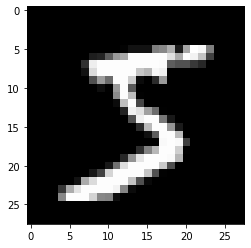

In [ ]:
plt.imshow(train_images[0], cmap='gray')

In [ ]:
# Parameters
max_layers = 2
num_max_units = 54
input_dim = 28
output_dim = 10

In [ ]:
# Mask to freeze layers or neurons in each layer
# Each neuron is trainable if 1, otherwise is weight = 0
hidden_mask = tf.Variable(tf.cast(tf.random.normal((num_max_units, max_layers))>(0.5), dtype=tf.dtypes.float64))

In [ ]:
def get_trainable_layers(hidden_mask):
  # if one column is all filled by zeros, the layer is not trainable and its weitghs have to be equal to I(54)
  return np.all(hidden_mask.numpy() == 0, axis=0) == False

In [ ]:
# Creación de las variables para el modelo con un diccionario
b = {}
w = {}

for layer in range(max_layers):
  trainable_layers = get_trainable_layers(hidden_mask)
  if layer == 0:
    b['b%s' % (layer+1)] = tf.Variable(tf.random.normal(shape=[num_max_units, 1], dtype=tf.dtypes.float64))
    w['w%s' % (layer+1)] =  tf.Variable(tf.random.normal(shape=[num_max_units, input_dim**2], dtype=tf.dtypes.float64))
  else:
    if trainable_layers[layer] == True:
      b['b%s' % (layer+1)]  =  tf.Variable(tf.random.normal(shape=[num_max_units, 1], dtype=tf.dtypes.float64))
      w['w%s' % (layer+1)]  =  tf.Variable(tf.random.normal(shape=[num_max_units, num_max_units], dtype=tf.dtypes.float64))
    else:
      b['b%s' % (layer+1)]  =  tf.Variable(tf.zeros(shape=[num_max_units, num_max_units], dtype=tf.dtypes.float64))
      w['w%s' % (layer+1)]  =  tf.Variable(tf.eye(num_max_units))

b['b%s' % (max_layers+1)]  =  tf.Variable(tf.random.normal(shape=[output_dim, 1], dtype=tf.dtypes.float64))
w['w%s' % (max_layers+1)]  =  tf.Variable(tf.random.normal(shape=[output_dim, num_max_units], dtype=tf.dtypes.float64))

In [ ]:
# Parametros de la red neuronal
hidden_activation = tf.nn.relu
output_activation = tf.nn.softmax
loss_fcn = tf.nn.sparse_softmax_cross_entropy_with_logits

In [ ]:
# Creación de la red neuronal

def get_loss(x, t, max_layers, hidden_mask):
  a_prev = 0
  trainable_layers = get_trainable_layers(hidden_mask)
  for layer in range(max_layers):
    w_aux = tf.transpose(tf.transpose(w['w%s' % (layer+1)])*hidden_mask[:,layer])
    b_aux = tf.transpose(tf.transpose(b['b%s' % (layer+1)])*hidden_mask[:,layer])
    if layer == 0: # For the input layer
      a = hidden_activation(tf.matmul(w_aux, x.T) + b_aux)
    else: # For the hidden layers
      if trainable_layers[layer] == 0:
        w_aux = w['w%s' % (layer+1)]
        b_aux = b['b%s' % (layer+1)]
      a = hidden_activation(tf.matmul(w_aux, a_prev) + b_aux)
    a_prev = a
  # For the ouput layer
  a = tf.matmul(w['w%s' % (max_layers+1)], a_prev) + b['b%s' % (max_layers+1)]
  y = output_activation(a, axis=0)

  return y

In [ ]:
# Variables 

x_train = np.reshape(train_images, (train_images.shape[0], input_dim**2))
x_test = np.reshape(test_images, (test_images.shape[0], input_dim**2))

In [ ]:
# Custom training loop from scratch (Parameters)
lr = 1e-1
trigger_thr = 0.025
nepochs = 20

In [ ]:
def train(lr, trigger_thr, nepochs, x, t, max_layers):
  training_loss = []
  for epoch in range(nepochs):
    with tf.GradientTape(persistent=True) as tape:
      # Compute the forward pass
      y = get_loss(x, t, max_layers, hidden_mask)
      xentropy = loss_fcn(tf.cast(tf.reshape(t, [-1]), dtype='int32'), tf.transpose(y))
      loss = tf.reduce_mean(xentropy)
      

    training_loss.append(loss.numpy())

    trainable_layers = get_trainable_layers(hidden_mask)

    for layer in range(max_layers):
      if trainable_layers[layer] == 1:
        w_aux = tf.transpose(tf.transpose(w['w%s' % (layer+1)])*hidden_mask[:,layer])
        b_aux = tf.transpose(tf.transpose(b['b%s' % (layer+1)])*hidden_mask[:,layer])
        # Compute gradients 
        db = tape.gradient(loss, b_aux)
        dw = tape.gradient(loss, w_aux)
        # Update parameters
        # w['w%s' % (layer+1)] = w['w%s' % (layer+1)] - lr*dw
        # b['b%s' % (layer+1)] = b['b%s' % (layer+1)] - lr*db
        w['w%s' % (layer+1)].assign(w['w%s' % (layer+1)] - lr*dw)
        b['b%s' % (layer+1)].assign(b['b%s' % (layer+1)] - lr*db)
  return training_loss


In [ ]:
training_loss = []
for epoch in range(nepochs):
  with tf.GradientTape(persistent=True) as tape:
    # Compute the forward pass
    y = get_loss(x_train, train_labels, max_layers, hidden_mask)
    xentropy = loss_fcn(tf.cast(tf.reshape(train_labels, [-1]), dtype='int32'), tf.transpose(y))
    loss = tf.reduce_mean(xentropy)
    layer = 0
    w_aux = tf.Variable(tf.transpose(tf.transpose(w['w%s' % (layer+1)])*hidden_mask[:,layer]))
    b_aux = tf.Variable(tf.transpose(tf.transpose(b['b%s' % (layer+1)])*hidden_mask[:,layer]))
  # Compute gradients 
  db = tape.gradient(loss, b_aux)
  dw = tape.gradient(loss, w_aux)

In [ ]:
db

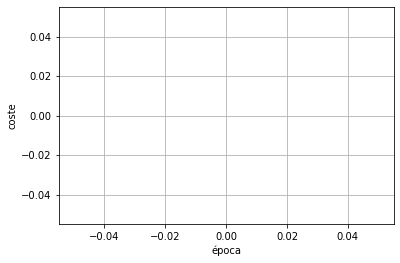

In [ ]:
import matplotlib.pyplot as plt

# Visualización 
plt.plot(training_loss)
plt.grid(True)
plt.xlabel("época")
plt.ylabel("coste")
plt.show()

#### Con TensorFlow 2

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Datos del mnist
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

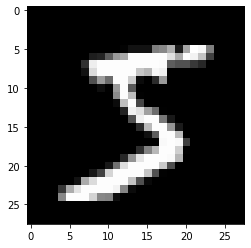

In [ ]:
plt.imshow(train_images[0], cmap='gray')

In [ ]:
# Parameters
max_layers = 2
num_max_units = 54
input_dim = 28
output_dim = 10

In [ ]:
# Mask to freeze layers or neurons in each layer
# Each neuron is trainable if 1, otherwise is weight = 0
hidden_mask = np.random.rand(num_max_units, max_layers)>(0.5)

In [ ]:
def get_trainable_layers(hidden_mask):
  # if one column is all filled by zeros, the layer is not trainable and its weitghs have to be equal to I(54)
  return np.all(hidden_mask == 0, axis=0) == False

In [ ]:
# Creación de las variables para el modelo con un diccionario
b = {}
w = {}

for layer in range(max_layers):
  # trainable_layers = get_trainable_layers(hidden_mask)
  if layer == 0:
    b['b%s' % (layer+1)] = tf.Variable(tf.random.normal(shape=[1, num_max_units], dtype=tf.dtypes.float64))
    w['w%s' % (layer+1)] =  tf.Variable(tf.random.normal(shape=[input_dim**2, num_max_units], dtype=tf.dtypes.float64))
  else:
    # if trainable_layers[layer] == True:
    b['b%s' % (layer+1)]  =  tf.Variable(tf.random.normal(shape=[1, num_max_units], dtype=tf.dtypes.float64))
    w['w%s' % (layer+1)]  =  tf.Variable(tf.random.normal(shape=[num_max_units, num_max_units], dtype=tf.dtypes.float64))
    # else:
    #  b['b%s' % (layer+1)]  =  tf.Variable(tf.zeros(shape=[num_max_units, num_max_units], dtype=tf.dtypes.float64))
    #  w['w%s' % (layer+1)]  =  tf.Variable(tf.eye(num_max_units))

b['b%s' % (max_layers+1)]  =  tf.Variable(tf.random.normal(shape=[1, output_dim], dtype=tf.dtypes.float64))
w['w%s' % (max_layers+1)]  =  tf.Variable(tf.random.normal(shape=[num_max_units, output_dim], dtype=tf.dtypes.float64))

In [ ]:
# Parametros de la red neuronal
hidden_activation = tf.nn.relu
output_activation = tf.nn.softmax
loss_fcn = tf.nn.sparse_softmax_cross_entropy_with_logits

In [ ]:
w['w%s' % (1)].shape

TensorShape([784, 54])

In [ ]:
b_aux = b['b%s' % (1)]

In [ ]:
b_aux.shape

TensorShape([1, 54])

In [ ]:
# Creación de la red neuronal

def get_loss(x, t, max_layers):
  a_prev = 0
  # trainable_layers = get_trainable_layers(hidden_mask)
  for layer in range(max_layers):
    w_aux = w['w%s' % (layer+1)]
    b_aux = b['b%s' % (layer+1)]
    if layer == 0: # For the input layer
      a = hidden_activation(tf.matmul(x, w_aux) + b_aux)
    else: # For the hidden layers
      # if trainable_layers[layer] == 0:
      a = hidden_activation(tf.matmul(a_prev, w_aux) + b_aux)
    a_prev = a
  # For the ouput layer
  a = tf.matmul(a_prev, w['w%s' % (max_layers+1)]) + b['b%s' % (max_layers+1)]
  y = output_activation(a, axis=0)

  return y, a

In [ ]:
import numpy as np

In [ ]:
# Variables 

x_train = tf.cast(np.reshape(train_images, (train_images.shape[0], input_dim**2)), dtype=tf.float64)
x_test = np.reshape(test_images, (test_images.shape[0], input_dim**2))

In [ ]:
# Custom training loop from scratch (Parameters)
lr = 1e-3
trigger_thr = 0.025
nepochs = 2000

In [ ]:
def train(lr, trigger_thr, nepochs, x, t, max_layers):
  training_loss = []
  for epoch in range(nepochs):
    with tf.GradientTape(persistent=True) as tape:
      # Compute the forward pass
      y, a = get_loss(x, t, max_layers)
      xentropy = loss_fcn(tf.cast(t, dtype='int32'), tf.transpose(y))
      loss = tf.reduce_mean(xentropy)
      

    training_loss.append(loss.numpy())

    # trainable_layers = get_trainable_layers(hidden_mask)

    for layer in range(max_layers):
      # if trainable_layers[layer] == 1:
      w_aux = w['w%s' % (layer+1)]
      b_aux = b['b%s' % (layer+1)]
      # Compute gradients 
      db = tape.gradient(loss, b_aux)
      dw = tape.gradient(loss, w_aux)
      # Update parameters
      w['w%s' % (layer+1)].assign(w['w%s' % (layer+1)] - lr*dw)
      b['b%s' % (layer+1)].assign(b['b%s' % (layer+1)] - lr*db)
  return training_loss

In [ ]:
training_loss =  train(lr, trigger_thr, 20, x_train, train_labels, max_layers)

ValueError: ignored

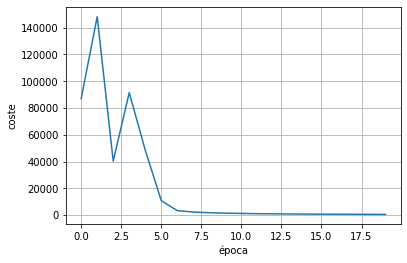

In [ ]:
import matplotlib.pyplot as plt

# Visualización 
plt.plot(training_loss)
plt.grid(True)
plt.xlabel("época")
plt.ylabel("coste")
plt.show()

In [ ]:
len(training_loss)

20

In [ ]:
training_loss[20-1]

2.3678305804598163

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model = tf.keras.Sequential()

model.add(Dense(input_shape=(784, ), units=54, activation='relu'))
model.add(Dense(units=54, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 54)                42390     
_________________________________________________________________
dense_5 (Dense)              (None, 54)                2970      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                550       
Total params: 45,910
Trainable params: 45,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=lr)

In [ ]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')

In [ ]:
model.fit(x_train, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3764
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4330
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3615
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3421
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3215
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3062
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3042
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2966
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2880
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2721
Epoch 11/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2881
Epoch 12/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2671
E

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f2b35dff7a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


### Opción con Kernels 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.
    x_test = np.reshape(x_test, (x_test.shape[0], 784))/255.
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
def plot_results(history):
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

In [ ]:
# Parameters
max_layers = 2
num_max_units = 128

layers = np.zeros(max_layers, dtype='uint32')
for i in range(max_layers): layers[i] = num_max_units

In [ ]:
# Mask to freeze layers or neurons in each layer
# Each neuron is trainable if 1, otherwise its weight = 0
hidden_mask = tf.Variable(tf.cast(tf.random.normal((num_max_units, max_layers))>(-1), dtype=tf.dtypes.float32))

In [ ]:
hidden_mask = tf.Variable(tf.cast(tf.ones((num_max_units, max_layers)), dtype=tf.dtypes.float32))

In [ ]:
class FluidNetwork:
#------------------------------------------------------------------------------- 
    def __init__(self, layers, hidden_mask, input_dim, output_dim):
        self.layers = layers
        self.L = len(layers)
        self.num_features = input_dim
        self.num_classes = output_dim
        self.hidden_mask = hidden_mask
        self.input_dim = input_dim

        self.W = {}
        self.b = {}
        
        self.dW = {}
        self.db = {}
        
        self.build_net()
#-------------------------------------------------------------------------------     
    def build_net(self):
      trainable_layers = self.get_trainable_layers()
      for i in range(self.L):
        if i == 0:
          self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], input_dim)))
          self.b[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], 1)))
        else:
          if trainable_layers[i] == 1:
            self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], 1))) 
          else: 
            self.W[i] = tf.Variable(tf.eye(self.layers[i], self.layers[i-1]))
            self.b[i] = tf.Variable(tf.zeros(shape=(self.layers[i], 1)))
      self.W[i+1] = tf.Variable(tf.random.normal(shape=(output_dim, self.layers[i])))
      self.b[i+1] = tf.Variable(tf.random.normal(shape=(output_dim, 1))) 
#-------------------------------------------------------------------------------             
    def get_trainable_layers(self):
    # if one column is all filled by zeros, the layer is not trainable and its weitghs have to be equal to I(units)
      aux = np.all(self.hidden_mask.numpy() == 0, axis=0) == False
      # aux[self.L-1] = 1 # output is always trainable
      return aux
#-------------------------------------------------------------------------------
    def forward_pass(self, X):
        A = tf.convert_to_tensor(X, dtype=tf.float32)

        for i in range(self.L+1):
            Z = tf.matmul(A, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i <= self.L:
                A = tf.nn.relu(Z)
            else:
                A = Z # do not call tf.nn.softmax with the output of a softmax as it internally does it
        return A
#-------------------------------------------------------------------------------
    def compute_loss(self, A, Y):
      loss = tf.nn.softmax_cross_entropy_with_logits(Y, A)
      return tf.reduce_mean(loss)
#-------------------------------------------------------------------------------    
    def update_params(self, lr):
        for i in range(self.L+1):
          # if i == 0:
          self.W[i].assign_sub(lr * self.dW[i])
          self.b[i].assign_sub(lr * self.db[i])
          # else:
            # self.W[i].assign_sub(lr * self.hidden_mask[:, i-1:i] * self.dW[i])
            # self.b[i].assign_sub(lr * self.db[i] * self.hidden_mask[:, i-1:i])
#-------------------------------------------------------------------------------
    def predict(self, X):
      A = self.forward_pass(X)
      return tf.argmax(tf.nn.softmax(A), axis=1)
#-------------------------------------------------------------------------------    
    def freeze_weights(self):
      for i in range(1, self.L): # the first element in hidden layer is never used
        self.W[i].assign = self.hidden_mask[:, i][None] * self.W[i]
        self.b[i].assign = self.hidden_mask[:, i][None] * self.b[i]    
#-------------------------------------------------------------------------------
    def summary(self): # Actualizar
        num_params = 0
        for i in range(0, self.L+1):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(self.L):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)
#-------------------------------------------------------------------------------
    def train_on_batch(self, X, Y, lr):
      X = tf.convert_to_tensor(X, dtype=tf.float32)
      Y = tf.convert_to_tensor(Y, dtype=tf.float32)
        
      with tf.GradientTape(persistent=True) as tape:
          self.freeze_weights()
          A = self.forward_pass(X)
          loss = self.compute_loss(A, Y)

      for i in range(self.L):
          self.dW[i] = tape.gradient(loss, self.W[i])
          self.db[i] = tape.gradient(loss, self.b[i])

      self.dW[i+1] = tape.gradient(loss, self.W[i+1])
      self.db[i+1] = tape.gradient(loss, self.b[i+1])

      del tape
      self.update_params(lr)
      return loss.numpy()
#-------------------------------------------------------------------------------
    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr):
      history = {
          'val_loss':[],
          'train_loss':[],
          'val_acc':[]
      }
      
      for e in range(0, epochs):
          epoch_train_loss = 0.
          print('Epoch{}'.format(e), end='-')
          for i in range(0, steps_per_epoch):
              x_batch = x_train[i*batch_size:(i+1)*batch_size]
              y_batch = y_train[i*batch_size:(i+1)*batch_size]
              
              batch_loss = self.train_on_batch(x_batch, y_batch,lr)
              epoch_train_loss += batch_loss
              
              if i%int(steps_per_epoch/10) == 0:
                  print(end='.')
                  
          history['train_loss'].append(epoch_train_loss/steps_per_epoch)
          val_A = self.forward_pass(x_test)
          val_loss = self.compute_loss(val_A, y_test).numpy()
          history['val_loss'].append(val_loss)
          val_preds = self.predict(x_test)
          val_acc =  np.mean(np.argmax(y_test, axis=1) == val_preds.numpy())
          history['val_acc'].append(val_acc)
          print('Val acc:',val_acc)
      return history


In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
input_dim = 28*28
output_dim = 10
net = FluidNetwork(layers, hidden_mask, input_dim, output_dim)
net.summary()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 0, Units 128
Layer 1, Units 128
--------------
Number of parameters: 118282


In [ ]:
# Parameters
batch_size = 104
epochs = 100
steps_per_epoch = int(x_train.shape[0]/batch_size)
lr = 3e-3

In [ ]:
A = net.forward_pass(x_train)

In [ ]:
net.compute_loss(A, y_train)

In [ ]:
net.db

In [ ]:
history = net.train(
    x_train,y_train,
    x_test, y_test,
    epochs, steps_per_epoch,
    batch_size, lr)

In [ ]:
hidden_mask = tf.Variable(tf.cast(tf.ones((num_max_units, max_layers)), dtype=tf.dtypes.float32))

In [ ]:
net.b

In [ ]:
x_train.shape

(60000, 784)

### Opcion con padding en los pesos

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd
import random
from sklearn.model_selection import ShuffleSplit

In [ ]:
X , (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def load_data():
  "Loads data and each time the function is called a new partition of xtrain is used"
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
  # Shuffle data
  # rs = ShuffleSplit(n_splits=5, test_size=.1)
  # x_train, y_train  = rs.get_n_splits(X) pensar 
  # Normalize and transform to categorical
  x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.
  x_test = np.reshape(x_test, (x_test.shape[0], 784))/255.
  y_train = tf.keras.utils.to_categorical(y_train)
  y_test = tf.keras.utils.to_categorical(y_test)

  return (x_train, y_train), (x_test, y_test)

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
def plot_results(history):
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

In [61]:
class FluidNetwork:
#-------------------------------------------------------------------------------    
  def __init__(self, layers):
      self.layers = layers
      self.L = len(layers) # input, hidden & output layer
      self.num_features = layers[0]
      self.num_classes = layers[-1]
      
      self.W = {}
      self.b = {}
      
      self.dW = {}
      self.db = {}
      
      self.setup()
      self.new_topology = []
#-------------------------------------------------------------------------------
  def setup(self):
      
      for i in range(1, self.L):
        self.W[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
        self.b[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
        self.W[i].assign(tf.Variable(tf.random.normal(shape=(self.layers[i],self.layers[i-1]))))
        self.b[i].assign(tf.Variable(tf.random.normal(shape=(self.layers[i],1))))
#-------------------------------------------------------------------------------
  def forward_pass(self, X):

      A = tf.convert_to_tensor(X, dtype=tf.float32)
      for i in range(1, self.L):
          Z = tf.matmul(A,tf.transpose(self.W[i])) + tf.transpose(self.b[i])
          if i != self.L-1:
              A = tf.nn.relu(Z)
          else:
              A = Z
      return A
#-------------------------------------------------------------------------------
  def compute_loss(self, A, Y):
      loss = tf.nn.softmax_cross_entropy_with_logits(Y,A)
      return tf.reduce_mean(loss)
#-------------------------------------------------------------------------------   
  def update_params(self, lr):
      for i in range(1,self.L):
          self.W[i].assign_sub(lr * self.dW[i])
          self.b[i].assign_sub(lr * self.db[i])
#-------------------------------------------------------------------------------          
  def predict(self, X):

      A = self.forward_pass(X)
      return tf.argmax(tf.nn.softmax(A), axis=1)
#-------------------------------------------------------------------------------  
  def info(self):
      num_params = 0
      for i in range(1, self.L):
          num_params += self.W[i].shape[0] * self.W[i].shape[1]
          num_params += self.b[i].shape[0]
      print('Input Features:', self.num_features)
      print('Number of Classes:', self.num_classes)
      print('Hidden Layers:')
      print('--------------')
      for i in range(1, self.L-1):
          print('Layer {}, Units {}'.format(i, self.layers[i]))
      print('--------------')
      print('Number of parameters:', num_params)
#-------------------------------------------------------------------------------
  def train_on_batch(self, X, Y, lr):
        
      X = tf.convert_to_tensor(X, dtype=tf.float32)
      Y = tf.convert_to_tensor(Y, dtype=tf.float32)
        
      with tf.GradientTape(persistent=True) as tape:
          A = self.forward_pass(X)
          loss = self.compute_loss(A, Y)
      for i in range(1, self.L):
          self.dW[i] = tape.gradient(loss, self.W[i])
          self.db[i] = tape.gradient(loss, self.b[i])
      del tape
      self.update_params(lr)
      return loss.numpy()
#-------------------------------------------------------------------------------    
  def update_keys(self):
    ini_list = {}
    for i in range(1, net.L): ini_list[i] = i
    self.b = dict(zip(ini_list, list(self.b.values())))    
    self.W = dict(zip(ini_list, list(self.W.values())))   
#-------------------------------------------------------------------------------
  def activate_neurons(self, i):
    "Activate one neuron means adding a extra cols for W[i] and extra rows for W[i-1]"
    if self.layers[i-1] < self.new_topology[i-1]: # activate more neurons
      neurons_to_act = self.new_topology[i-1] - self.layers[i-1]
      if i != 2 :  # Only if is not the first layer of this case
        # First add cols to W[i]
        # W
        aux = tf.Variable(tf.random.normal(shape=(self.new_topology[i], neurons_to_act)))
        self.W[i].assign(tf.concat(axis=1, values=[self.W[i], aux]))
      # Then add rows to W[i-1]
      # W
      aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, self.new_topology[i-2])))
      self.W[i-1].assign(tf.concat(axis=0, values=[self.W[i-1], aux]))
      # b
      aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, 1)))
      self.b[i-1].assign(tf.concat(axis=0, values=[self.b[i-1], aux]))
    elif self.layers[i-1] > self.new_topology[i-1]: # deactivate some randomly neurons
      neurons_to_act = self.new_topology[i-1]
      random_index = np.random.choice(self.layers[i-1], neurons_to_act, replace=False)
      if (i != self.L - 1 & self.L < len(self.new_topology)) | self.L >= len(self.new_topology): # Only if is not the last layer
        # First remove extra cols from the current layer
        # W
        aux = pd.DataFrame(self.W[i].numpy())
        aux = aux.reindex(columns=random_index).dropna(axis=1)
        self.W[i].assign(aux.to_numpy())
      # Then remove extra rows from the previous layer
      # W
      aux = np.transpose(pd.DataFrame(self.W[i-1].numpy()))
      aux = aux.reindex(columns=random_index).dropna(axis=1)
      self.W[i-1].assign(aux.T.to_numpy())
      # b
      aux = np.transpose(pd.DataFrame(self.b[i-1].numpy()))
      aux = aux.reindex(columns=random_index).dropna(axis=1)
      self.b[i-1].assign(aux.T.to_numpy())
#-------------------------------------------------------------------------------    
  def AG_update(self): # weight padding
    self.prev_W = self.W.copy()
    self.prev_b = self.b.copy()
    new_L = len(self.new_topology)

    for i in range(2, new_L): # 2 as the input alwyas remain the same
      if self.L < new_L : # The new topology contains more layers
        if i <= self.L - 1 : # Only apply for hidden layers
          self.activate_neurons(i, flag)
        else: # add new layers,and reestructure output weights for the last layer
          if i == new_L - 1: # copy the output weights from the previous structure
            self.W[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
            self.b[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
            if (self.layers[-2] >= self.new_topology[-2]):
              neurons_to_act = self.new_topology[i-1]
              random_index = np.random.choice(self.layers[self.L-2], neurons_to_act, replace=False)
              aux = pd.DataFrame(self.prev_W[self.L -1].numpy())
              aux = aux.reindex(columns=random_index).dropna(axis=1)
              self.W[i].assign(aux.to_numpy())
            else:
              neurons_to_act = self.new_topology[-2] - self.layers[-2]
              aux = tf.Variable(tf.random.normal(shape=(self.new_topology[i], neurons_to_act)))
              self.W[i].assign(tf.concat(axis=1, values=[self.prev_W[self.L -1], aux]))

            self.b[i].assign(self.prev_b[self.L -1])
          # Add more layers
          self.W[i-1] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
          self.b[i-1] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
          self.W[i-1].assign(tf.Variable(tf.random.normal(shape=(self.new_topology[i-1],self.new_topology[i-2]))))
          self.b[i-1].assign(tf.Variable(tf.random.normal(shape=(self.new_topology[i-1],1))))

      elif self.L > new_L: # The new topology contains less layers
        # Only apply for hidden layers
        self.activate_neurons(i, flag)
        if i == new_L - 1 :
          # First remove extra layers and then assign the ouput weights to the output layer
          index_aux = np.arange(start=1, stop=new_L-1, step=1)
          # index_aux[-1] = self.L - 1
          mask = np.isin(list(self.W.keys()), index_aux) == False
          keys_to_remove = np.array(list(self.W.keys()))[mask]
          # W
          d = self.W
          l = keys_to_remove
          list(map(d.__delitem__, filter(d.__contains__,l)))
          # b
          d = self.b
          l = keys_to_remove
          list(map(d.__delitem__, filter(d.__contains__,l)))
          # Assign output weights to the ouput layer
          self.W[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
          self.b[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
          if (self.layers[-2] >= self.new_topology[-2]):
            neurons_to_act = self.new_topology[i-1]
            random_index = np.random.choice(self.layers[self.L-2], neurons_to_act, replace=False)
            aux = pd.DataFrame(self.prev_W[self.L -1].numpy())
            aux = aux.reindex(columns=random_index).dropna(axis=1)
            self.W[i].assign(aux.to_numpy())
          else:
            neurons_to_act = self.new_topology[-2] - self.layers[-2]
            aux = tf.Variable(tf.random.normal(shape=(self.new_topology[i], neurons_to_act)))
            self.W[i].assign(tf.concat(axis=1, values=[self.prev_W[self.L -1], aux]))

          self.b[i].assign(self.prev_b[self.L -1])           
          break
      else: # The new topology contains the same layers but might differ in the number of units per layer
        self.activate_neurons(i)
    
    # Update layers attributes and keys
    self.L = len(self.new_topology)
    self.layers = self.new_topology
    # self.update_keys()
#-------------------------------------------------------------------------------
  def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr, trigger):

      history = {
          'val_loss':[],
          'train_loss':[],
          'val_acc':[]
      }
      
      flag = 0
      for e in range(0, epochs):
          epoch_train_loss = 0.
          print('Epoch{}'.format(e), end='.')
          for i in range(0, steps_per_epoch):
              x_batch = x_train[i*batch_size:(i+1)*batch_size]
              y_batch = y_train[i*batch_size:(i+1)*batch_size]
              
              batch_loss = self.train_on_batch(x_batch, y_batch,lr)
              epoch_train_loss += batch_loss
              
              if i%int(steps_per_epoch/10) == 0:
                  print(end='.')
                  
          history['train_loss'].append(epoch_train_loss/steps_per_epoch)
          val_A = self.forward_pass(x_test)
          val_loss = self.compute_loss(val_A, y_test).numpy()
          history['val_loss'].append(val_loss)
          val_preds = self.predict(x_test)
          val_acc =    np.mean(np.argmax(y_test, axis=1) == val_preds.numpy())
          history['val_acc'].append(val_acc)
          print('Val acc:',val_acc)
          
          if e>1 & flag == 0:
            flag = 1
            if (np.abs(history['train_loss'][-2]-history['train_loss'][-1]/history['train_loss'][-2])>=trigger):
              print('AG trigger') 
              self.new_topology = [28*28, 128, 54, 128, 10]
              self.AG_update()
      return history

In [ ]:
# Topological parameters
max_layers = 3+2
num_max_units = 128
input_dim = 28*28
output_dim = 10

layers = np.zeros(max_layers, dtype='uint32')
for i in range(max_layers): 
  if i == 0:
    layers[i] = input_dim
  elif i == max_layers-1:
    layers[i] = output_dim
  else:
    layers[i] = num_max_units

In [62]:
net = FluidNetwork(layers)

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
# Training parameters
batch_size = 120
epochs = 3
steps_per_epoch = int(x_train.shape[0]/batch_size)
lr = 3e-3
trigger = 0.1
print('Steps per epoch', steps_per_epoch)

Steps per epoch 500


In [ ]:
layers

array([784, 128, 128, 128,  10], dtype=uint32)

In [ ]:
# COMPROBACIONES:
net.new_topology = [784, 3, 300, 20, 10]
net.AG_update()
for i in range(1, net.L):
 print(net.W[i].numpy().shape)

InvalidArgumentError: ignored

In [ ]:
self.prev_W = net.W.copy()
self.prev_b = net.b.copy()
new_L = len(net.new_topology)

for i in range(2, new_L): # 2 as the input alwyas remain the same
  if net.L < new_L : # The new topology contains more layers
    if i <= net.L - 1 : # Only apply for hidden layers
      net.activate_neurons(i)
    else: # add new layers,and reestructure output weights for the last layer
      if i == new_L - 1: # copy the output weights from the previous structure
        net.W[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
        net.b[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
        if (net.layers[-2] >= net.new_topology[-2]):
          neurons_to_act = net.new_topology[i-1]
          random_index = np.random.choice(net.layers[net.L-2], neurons_to_act, replace=False)
          aux = pd.DataFrame(self.prev_W[net.L -1].numpy())
          aux = aux.reindex(columns=random_index).dropna(axis=1)
          net.W[i].assign(aux.to_numpy())
        else:
          neurons_to_act = net.new_topology[-2] - net.layers[-2]
          aux = tf.Variable(tf.random.normal(shape=(net.new_topology[i], neurons_to_act)))
          net.W[i].assign(tf.concat(axis=1, values=[self.prev_W[net.L -1], aux]))

        net.b[i].assign(self.prev_b[net.L -1])
      # Add more layers
      net.W[i-1] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
      net.b[i-1] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
      net.W[i-1].assign(tf.Variable(tf.random.normal(shape=(net.new_topology[i-1],net.new_topology[i-2]))))
      net.b[i-1].assign(tf.Variable(tf.random.normal(shape=(net.new_topology[i-1],1))))

  elif net.L > new_L: # The new topology contains less layers
    # Only apply for hidden layers
    net.activate_neurons(i)
    if i == new_L - 1 :
      # First remove extra layers and then assign the ouput weights to the output layer
      index_aux = np.arange(start=1, stop=new_L-1, step=1)
      # index_aux[-1] = self.L - 1
      mask = np.isin(list(net.W.keys()), index_aux) == False
      keys_to_remove = np.array(list(net.W.keys()))[mask]
      # W
      d = net.W
      l = keys_to_remove
      list(map(d.__delitem__, filter(d.__contains__,l)))
      # b
      d = net.b
      l = keys_to_remove
      list(map(d.__delitem__, filter(d.__contains__,l)))
      # Assign output weights to the ouput layer
      net.W[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
      net.b[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
      if (net.layers[-2] >= net.new_topology[-2]):
        neurons_to_act = net.new_topology[i-1]
        random_index = np.random.choice(net.layers[net.L-2], neurons_to_act, replace=False)
        aux = pd.DataFrame(self.prev_W[net.L -1].numpy())
        aux = aux.reindex(columns=random_index).dropna(axis=1)
        net.W[i].assign(aux.to_numpy())
      else:
        neurons_to_act = net.new_topology[-2] - net.layers[-2]
        aux = tf.Variable(tf.random.normal(shape=(net.new_topology[i], neurons_to_act)))
        net.W[i].assign(tf.concat(axis=1, values=[self.prev_W[net.L -1], aux]))

      net.b[i].assign(self.prev_b[net.L -1])           
      break
  else: # The new topology contains the same layers but might differ in the number of units per layer
    net.activate_neurons(i)

# Update layers attributes and keys
net.L = len(net.new_topology)
net.layers = net.new_topology

In [ ]:

if net.layers[i-1] < net.new_topology[i-1]: # activate more neurons
  neurons_to_act = net.new_topology[i-1] - net.layers[i-1]
  if (i != 2  & net.L < len(net.new_topology)) | net.L >= len(net.new_topology): # Only if is not the first layer of this case
    # First add cols to W[i]
    # W
    aux = tf.Variable(tf.random.normal(shape=(net.new_topology[i], neurons_to_act)))
    net.W[i].assign(tf.concat(axis=1, values=[net.W[i], aux]))
  # Then add rows to W[i-1]
  # W
  aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, net.new_topology[i-2])))
  net.W[i-1].assign(tf.concat(axis=0, values=[net.W[i-1], aux]))
  # b
  aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, 1)))
  net.b[i-1].assign(tf.concat(axis=0, values=[net.b[i-1], aux]))
elif net.layers[i-1] > net.new_topology[i-1]: # deactivate some randomly neurons
  neurons_to_act = net.new_topology[i-1]
  random_index = np.random.choice(net.layers[i-1], neurons_to_act, replace=False)
  if (i != net.L - 1 & net.L < len(net.new_topology)) | net.L >= len(net.new_topology): # Only if is not the last layer
    # First remove extra cols from the current layer
    # W
    aux = pd.DataFrame(net.W[i].numpy())
    aux = aux.reindex(columns=random_index).dropna(axis=1)
    net.W[i].assign(aux.to_numpy())
  # Then remove extra rows from the previous layer
  # W
  aux = np.transpose(pd.DataFrame(net.W[i-1].numpy()))
  aux = aux.reindex(columns=random_index).dropna(axis=1)
  net.W[i-1].assign(aux.T.to_numpy())
  # b
  aux = np.transpose(pd.DataFrame(net.b[i-1].numpy()))
  aux = aux.reindex(columns=random_index).dropna(axis=1)
  net.b[i-1].assign(aux.T.to_numpy())

InvalidArgumentError: ignored

In [ ]:
history = net.train(
    x_train,y_train,
    x_test, y_test,
    epochs, steps_per_epoch,
    batch_size, lr, trigger)

Epoch0...........Val acc: 0.2528
Epoch1...........Val acc: 0.2592
AG trigger
Epoch2...........Val acc: 0.2083


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

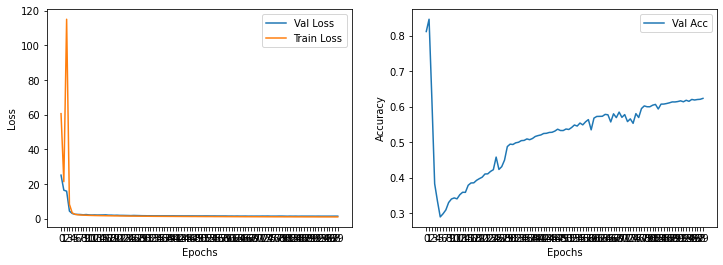

In [ ]:
plot_results(history)

### Opcion con padding en los pesos (SOL)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd
import random
from sklearn.model_selection import ShuffleSplit
!pip install fitter
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import tensorflow_probability as tfp

     |████████████████████████████████| 47 kB 4.0 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=9e2eced39df2e4bce815962d305f2722e5b8a98c9d0e819f00369640a9adbf2a
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=1bb1ae8ce71a05993f7ab2835df1fba8bea673d74f44a69ce96d84887d7f683a
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [2]:
def load_data():
  "Loads data and each time the function is called a new partition of xtrain is used"
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
  # Shuffle data
  # rs = ShuffleSplit(n_splits=5, test_size=.1)
  # x_train, y_train  = rs.get_n_splits(X) pensar 
  # Normalize and transform to categorical
  x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.
  x_test = np.reshape(x_test, (x_test.shape[0], 784))/255.
  y_train = tf.keras.utils.to_categorical(y_train)
  y_test = tf.keras.utils.to_categorical(y_test)

  return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
def plot_results(history):
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

In [98]:
class FluidNetwork:
#-------------------------------------------------------------------------------    
  def __init__(self, layers):
      self.layers = layers
      self.L = len(layers) # input, hidden & output layer
      self.num_features = layers[0]
      self.num_classes = layers[-1]
      
      self.W = {}
      self.b = {}
      
      self.prev_W = {}
      self.prev_b = {}

      self.dW = {}
      self.db = {}
      
      self.setup()
      self.new_topology = []
#-------------------------------------------------------------------------------
  def setup(self):
      
      for i in range(1, self.L):
        self.W[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
        self.b[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
        self.W[i].assign(tf.Variable(tf.random.normal(shape=(self.layers[i],self.layers[i-1]))))
        self.b[i].assign(tf.Variable(tf.random.normal(shape=(self.layers[i],1))))
#-------------------------------------------------------------------------------
  def forward_pass(self, X):

      A = tf.convert_to_tensor(X, dtype=tf.float32)
      for i in range(1, self.L):
          Z = tf.matmul(A,tf.transpose(self.W[i])) + tf.transpose(self.b[i])
          if i != self.L-1:
              A = tf.nn.relu(Z)
          else:
              A = Z
      return A
#-------------------------------------------------------------------------------
  def compute_loss(self, A, Y):
      loss = tf.nn.softmax_cross_entropy_with_logits(Y,A)
      return tf.reduce_mean(loss)
#-------------------------------------------------------------------------------   
  def update_params(self, lr):
      for i in range(1,self.L):
          self.W[i].assign_sub(lr * self.dW[i])
          self.b[i].assign_sub(lr * self.db[i])
#-------------------------------------------------------------------------------          
  def predict(self, X):

      A = self.forward_pass(X)
      return tf.argmax(tf.nn.softmax(A), axis=1)
#-------------------------------------------------------------------------------  
  def info(self):
      num_params = 0
      for i in range(1, self.L):
          num_params += self.W[i].shape[0] * self.W[i].shape[1]
          num_params += self.b[i].shape[0]
      print('Input Features:', self.num_features)
      print('Number of Classes:', self.num_classes)
      print('Hidden Layers:')
      print('--------------')
      for i in range(1, self.L-1):
          print('Layer {}, Units {}'.format(i, self.layers[i]))
      print('--------------')
      print('Number of parameters:', num_params)
#-------------------------------------------------------------------------------
  def train_on_batch(self, X, Y, lr):
        
      X = tf.convert_to_tensor(X, dtype=tf.float32)
      Y = tf.convert_to_tensor(Y, dtype=tf.float32)
        
      with tf.GradientTape(persistent=True) as tape:
          A = self.forward_pass(X)
          loss = self.compute_loss(A, Y)
      for i in range(1, self.L):
          self.dW[i] = tape.gradient(loss, self.W[i])
          self.db[i] = tape.gradient(loss, self.b[i])
      del tape
      self.update_params(lr)
      return loss.numpy()
#-------------------------------------------------------------------------------    
  def update_keys(self):
    ini_list = {}
    for i in range(1, net.L): ini_list[i] = i
    self.b = dict(zip(ini_list, list(self.b.values())))    
    self.W = dict(zip(ini_list, list(self.W.values())))  
#-------------------------------------------------------------------------------  
  def sample_distribution(self,param, layer, shape):
    'Param: W (1) /b (0), layer: number of weight, size: tensor shape'
    # Find best distribution to fit in dataset
    if param == 1:
      dataset = pd.DataFrame(self.prev_W[layer].numpy())
    else:
      dataset = pd.DataFrame(self.prev_b[layer].numpy())

    f = Fitter(dataset,distributions= get_common_distributions()) # only common distribution out of the 80 are tested
    f.fit()
    summary = pd.DataFrame(f.summary(method='bic')) 
    dist_name = summary['bic'].keys()[0] # best dist according to bic values
    # best_params = list(f.get_best(method='bic').values())[0] # best params 
    best_params = f.fitted_param[dist_name]
    # Invoke distribution object
    tfd = tfp.distributions
    # Switch-case sentence
    if dist_name == 'cauchy':
      return tf.cast(tf.Variable(tfd.Cauchy(loc=best_params[0], scale=best_params[1]).sample(shape)), tf.float32)
    elif dist_name == 'chi2':
      return tf.cast(tf.Variable(tfd.Chi2(best_params[0]).sample(shape)), tf.float32)
    elif dist_name == 'expon':
      return tf.cast(tf.Variable(tfd.Exponential(np.abs(best_params[0])).sample(shape)), tf.float32)
    elif dist_name == 'exponpow':
      return tf.cast(tf.Variable(tfd.ExponentiallyModifiedGaussian(loc=best_params[0],
                                              scale=best_params[1],
                                              rate=best_params[2]).sample(shape)), tf.float32)
    elif dist_name == 'gamma':
      return tf.cast(tf.Variable(tfd.Gamma(best_params[0], best_params[1], best_params[2]).sample(shape)), tf.float32)
    elif dist_name == 'lognorm':
      return tf.cast(tf.Variable(tfd.LogNormal(loc=best_params[0], scale=best_params[1]).sample(shape)), tf.float32)
    elif dist_name == 'norm':
      return tf.cast(tf.Variable(tfd.Normal(loc=best_params[0], scale=best_params[1]).sample(shape)), tf.float32)
    elif dist_name == 'powerlaw': # Its not defined
      return tf.cast(tf.Variable(tfd.Normal(loc=best_params[0], scale=best_params[1]).sample(shape)), tf.float32)
    elif dist_name == 'rayleigh':
      return tf.cast(tf.Variable(tfp.random.rayleigh(scale=best_params[1]).sample(shape)), tf.float32)
    else: # uniform
      return tf.cast(tf.Variable(tfd.Uniform(low=best_params[0], high=best_params[1]).sample(shape)), tf.float32)
#-------------------------------------------------------------------------------
  def activate_neurons(self, i, flag):
    "Activate one neuron means adding a extra cols for W[i] and extra rows for W[i-1]"
    if self.layers[i-1] < self.new_topology[i-1]: # activate more neurons
      neurons_to_act = self.new_topology[i-1] - self.layers[i-1]
      # First add cols to W[i]
      # W
      if flag == 1:
        try:
          shape = (self.layers[i], neurons_to_act)
          aux = self.sample_distribution(1, i, shape)
        except:
          print('Normal dist instead')
        finally:
          aux = tf.Variable(tf.random.normal(shape=(self.layers[i], neurons_to_act)))
      else:
        aux = tf.Variable(tf.random.normal(shape=(self.layers[i], neurons_to_act)))
      self.W[i].assign(tf.concat(axis=1, values=[self.W[i], aux]))
      # Then add rows to W[i-1]
      # W
      if flag == 1:
        try:
          shape = (neurons_to_act, self.new_topology[i-2])
          aux = self.sample_distribution(1, i, shape)
        except:
          print('Normal dist instead')
        finally:
          aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, self.new_topology[i-2])))
      else:
        aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, self.new_topology[i-2])))
      self.W[i-1].assign(tf.concat(axis=0, values=[self.W[i-1], aux]))
      # b
      if flag == 1:
        try:
          shape = (neurons_to_act, 1)
          aux = self.sample_distribution(0, i, shape)
        except:
          print('Normal dist instead')
        finally:
          aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, 1)))
      else:
        aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, 1)))
      self.b[i-1].assign(tf.concat(axis=0, values=[self.b[i-1], aux]))

    elif self.layers[i-1] > self.new_topology[i-1]: # deactivate some randomly neurons
      neurons_to_act = self.new_topology[i-1]
      random_index = np.random.choice(self.layers[i-1], neurons_to_act, replace=False)
      # First remove extra cols from the current layer
      # W
      aux = pd.DataFrame(self.W[i].numpy())
      aux = aux.reindex(columns=random_index).dropna(axis=1)
      self.W[i].assign(aux.to_numpy())
      # Then remove extra rows from the previous layer
      # W
      aux = np.transpose(pd.DataFrame(self.W[i-1].numpy()))
      aux = aux.reindex(columns=random_index).dropna(axis=1)
      self.W[i-1].assign(aux.T.to_numpy())
      # b
      aux = np.transpose(pd.DataFrame(self.b[i-1].numpy()))
      aux = aux.reindex(columns=random_index).dropna(axis=1)
      self.b[i-1].assign(aux.T.to_numpy())
#-------------------------------------------------------------------------------    
  def AG_update(self, flag): # weight padding # i is the index for weights not for the layers 
    self.prev_W = self.W.copy()
    self.prev_b = self.b.copy()
    new_L = len(self.new_topology)

    for i in range(2, new_L): # 2 as the input alwyas remain the same
      if self.L < new_L : # The new topology contains more layers
        if i <= self.L - 2 : # Only apply for hidden layers
          self.activate_neurons(i, flag)
        else: 
          if i == new_L - 1: # copy the output weights from the previous structure
            self.W[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
            self.b[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
            if (self.layers[-2] >= self.new_topology[-2]):
              neurons_to_act = self.new_topology[i-1]
              random_index = np.random.choice(self.layers[self.L-2], neurons_to_act, replace=False)
              aux = pd.DataFrame(self.prev_W[self.L -1].numpy())
              aux = aux.reindex(columns=random_index).dropna(axis=1)
              self.W[i].assign(aux.to_numpy())
            else:
              neurons_to_act = self.new_topology[-2] - self.layers[-2]
              if flag == 1: # cambiarlo a 1
                shape = (self.new_topology[i], neurons_to_act)
                try:
                  aux = self.sample_distribution(1, self.L-1, shape)
                except:
                  print('Normal dist instead')
                finally:
                   aux = tf.Variable(tf.random.normal(shape=(self.new_topology[i], neurons_to_act)))
              else:
                 aux = tf.Variable(tf.random.normal(shape=(self.new_topology[i], neurons_to_act)))
              self.W[i].assign(tf.concat(axis=1, values=[self.prev_W[self.L -1], aux]))

            self.b[i].assign(self.prev_b[self.L -1])

          else: # add more layers and reestructure weights for the previous layer
          # Reestructure weights for the last layer
            if i == self.L -1 :
              if self.layers[i-1] < self.new_topology[i-1]: # activate more neurons
                neurons_to_act = self.new_topology[i-1] - self.layers[i-1]
                # Then add rows to W[i-1]
                # W
                if flag == 1:
                  try:
                    shape = (neurons_to_act, self.new_topology[i-2])
                    aux = self.sample_distribution(1, i, shape)
                  except:
                    print('Normal dist instead')
                  finally:
                    aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, self.new_topology[i-2])))
                else:
                  aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, self.new_topology[i-2])))
                self.W[i-1].assign(tf.concat(axis=0, values=[self.W[i-1], aux]))
                # b
                if flag == 1:
                  try:
                    shape = (neurons_to_act, 1)
                    aux = tf.cast(self.sample_distribution(0, i, shape), tf.float32)
                  except:
                    print('Normal distribution')
                  finally:
                    aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, 1)))
                else:
                  aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, 1)))
                self.b[i-1].assign(tf.concat(axis=0, values=[self.b[i-1], aux]))

              elif self.layers[i-1] > self.new_topology[i-1]: # deactivate some randomly neurons
                neurons_to_act = self.new_topology[i-1]
                random_index = np.random.choice(self.layers[i-1], neurons_to_act, replace=False)
                # Then remove extra rows from the previous layer
                # W
                aux = np.transpose(pd.DataFrame(self.W[i-1].numpy()))
                aux = aux.reindex(columns=random_index).dropna(axis=1)
                self.W[i-1].assign(aux.T.to_numpy())
                # b
                aux = np.transpose(pd.DataFrame(self.b[i-1].numpy()))
                aux = aux.reindex(columns=random_index).dropna(axis=1)
                self.b[i-1].assign(aux.T.to_numpy())

          # Add more layers
          self.W[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
          self.b[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
          if flag == 1: # cambiarlo a 1
            try:
              self.W[i].assign(self.sample_distribution(1, self.L-1, shape=(self.new_topology[i],self.new_topology[i-1])))
              self.b[i].assign(tf.cast(self.sample_distribution(0, self.L-1, shape=(self.new_topology[i],1)), tf.float32))
            except:
              print('Normal dist instead')
            finally:
              self.W[i].assign(tf.Variable(tf.random.normal(shape=(self.new_topology[i],self.new_topology[i-1]))))
              self.b[i].assign(tf.Variable(tf.random.normal(shape=(self.new_topology[i],1)))) 
          else:
            self.W[i].assign(tf.Variable(tf.random.normal(shape=(self.new_topology[i],self.new_topology[i-1]))))
            self.b[i].assign(tf.Variable(tf.random.normal(shape=(self.new_topology[i],1))))

      elif self.L > new_L: # The new topology contains less layers
        if i == new_L - 1 :
        # Firstly, add/remove weights from the previous layer
          if self.layers[i-1] < self.new_topology[i-1]: # activate more neurons
            neurons_to_act = self.new_topology[i-1] - self.layers[i-1]
            # Then add rows to W[i-1]
            # W
            if flag == 1:
              try:
                shape = (neurons_to_act, self.new_topology[i-2])
                aux = self.sample_distribution(1, i, shape)
              except:
                print('Normal dist instead')
              finally:
                aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, self.new_topology[i-2])))
            else:
              aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, self.new_topology[i-2])))
            self.W[i-1].assign(tf.concat(axis=0, values=[self.W[i-1], aux]))
            # b
            if flag == 1:
              try:
                shape = (neurons_to_act, 1)
                aux = tf.cast(self.sample_distribution(0, i, shape), tf.float32)
              except:
                print('Normal dist instead')
              finally:
                aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, 1)))
            else:
              aux = tf.Variable(tf.random.normal(shape=(neurons_to_act, 1)))
            self.b[i-1].assign(tf.concat(axis=0, values=[self.b[i-1], aux]))

          elif self.layers[i-1] > self.new_topology[i-1]: # deactivate some randomly neurons
            neurons_to_act = self.new_topology[i-1]
            random_index = np.random.choice(self.layers[i-1], neurons_to_act, replace=False)
            # Then remove extra rows from the previous layer
            # W
            aux = np.transpose(pd.DataFrame(self.W[i-1].numpy()))
            aux = aux.reindex(columns=random_index).dropna(axis=1)
            self.W[i-1].assign(aux.T.to_numpy())
            # b
            aux = np.transpose(pd.DataFrame(self.b[i-1].numpy()))
            aux = aux.reindex(columns=random_index).dropna(axis=1)
            self.b[i-1].assign(aux.T.to_numpy())

          # Secondly, remove extra layers and then assign the ouput weights to the output layer
          index_aux = np.arange(start=1, stop=new_L-1, step=1)
          # index_aux[-1] = self.L - 1
          mask = np.isin(list(self.W.keys()), index_aux) == False
          keys_to_remove = np.array(list(self.W.keys()))[mask]
          # W
          d = self.W
          l = keys_to_remove
          list(map(d.__delitem__, filter(d.__contains__,l)))
          # b
          d = self.b
          l = keys_to_remove
          list(map(d.__delitem__, filter(d.__contains__,l)))
          # Assign output weights to the ouput layer
          self.W[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) # to enable future modifications
          self.b[i] = tf.Variable(1.0, shape=tf.TensorShape(None)) 
          if (self.layers[-2] >= self.new_topology[-2]):
            neurons_to_act = self.new_topology[i-1]
            random_index = np.random.choice(self.layers[self.L-2], neurons_to_act, replace=False)
            aux = pd.DataFrame(self.prev_W[self.L -1].numpy())
            aux = aux.reindex(columns=random_index).dropna(axis=1)
            self.W[i].assign(aux.to_numpy())
          else:
            neurons_to_act = self.new_topology[-2] - self.layers[-2]
            if flag == 1:
              try:
                shape = (self.new_topology[i], neurons_to_act)
                aux = self.sample_distribution(1, i, shape)
              except:
                print('Normal dist instead')
              finally:
                aux = tf.Variable(tf.random.normal(shape=(self.new_topology[i], neurons_to_act)))
            else:
              aux = tf.Variable(tf.random.normal(shape=(self.new_topology[i], neurons_to_act)))
            self.W[i].assign(tf.concat(axis=1, values=[self.prev_W[self.L -1], aux]))

          self.b[i].assign(self.prev_b[self.L -1])           
          break
        else:
        # Only apply for hidden layers
          self.activate_neurons(i, flag)
      else: # The new topology contains the same layers but might differ in the number of units per layer
        self.activate_neurons(i, flag)

    # Update layers attributes and keys
    self.L = len(self.new_topology)
    self.layers = self.new_topology
#-------------------------------------------------------------------------------
  def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr, trigger):

      history = {
          'val_loss':[],
          'train_loss':[],
          'val_acc':[]
      }
      
      flag = 0
      for e in range(0, epochs):
          epoch_train_loss = 0.
          print('Epoch{}'.format(e), end='.')
          for i in range(0, steps_per_epoch):
              x_batch = x_train[i*batch_size:(i+1)*batch_size]
              y_batch = y_train[i*batch_size:(i+1)*batch_size]
              
              batch_loss = self.train_on_batch(x_batch, y_batch,lr)
              epoch_train_loss += batch_loss
              
              if i%int(steps_per_epoch/10) == 0:
                  print(end='.')
                  
          history['train_loss'].append(epoch_train_loss/steps_per_epoch)
          val_A = self.forward_pass(x_test)
          val_loss = self.compute_loss(val_A, y_test).numpy()
          history['val_loss'].append(val_loss)
          val_preds = self.predict(x_test)
          val_acc =    np.mean(np.argmax(y_test, axis=1) == val_preds.numpy())
          history['val_acc'].append(val_acc)
          print('Val acc:',val_acc)
          
          if e>1 & flag == 0:
            flag = 1
            if (np.abs(history['train_loss'][-2]-history['train_loss'][-1]/history['train_loss'][-2])>=trigger):
              print('AG trigger') 
              # GA Parameters
              num_max_units = 128
              num_min_units = 10
              num_max_layers = 5
              num_min_layers = 2
              input_dim = 28*28
              output_dim = 10
              n_stall_generations = 30
              n_iters = 30
              sample_update = 0.1
              # Invoke GA class 
              net_algo = self.copy_actual_instance()
              algo = GA(net_algo, sample_update, num_max_units, num_min_units, num_max_layers, num_min_layers, input_dim, output_dim)
              # Run GA optimization
              algo.run_algo(n_stall_generations, n_iters)
              # Save best NN & update params
              best_NN = algo.best_NN
              self.layers = best_NN.layers
              self.L = len(self.layers) # input, hidden & output layer
              for i in range(1, self.L):
                self.W[i].assign(best_NN.W[i])
                self.b[i].assign(best_NN.b[i])

      return history
#-------------------------------------------------------------------------------
  def copy_actual_instance(self):
    copynet = FluidNetwork(self.layers)
    for i in range(1, copynet.L):
      copynet.W[i].assign(self.W[i])
      copynet.b[i].assign(self.b[i])
    return copynet
#-------------------------------------------------------------------------------    

In [99]:
class GA():
  "Each cromosome represents a possible structure of a new NN"
#-------------------------------------------------------------------------------
  def __init__(self, main_fluid_net, sample_params, num_max_units, num_min_units, num_max_layers, num_min_layers,input_dim, output_dim):
    self.num_max_units = num_max_units
    self.num_min_units = num_min_units
    self.num_max_layers = num_max_layers
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.pop_layers = []
    self.n_pop = []
    self.best_fitness = []
    self.best_NN = []
    self.best_layers = []
    self.pop_net = [] # the diff among pop_layers and pop_net is that the last one also incluse opt weights
    self.pop_fitness = []
    self.num_min_layers = num_min_layers
    self.pop_initial()
    self.main_fluid_net = main_fluid_net
    self.sample_params = sample_params # % of params to be sample out of a predetermined distribution
#-------------------------------------------------------------------------------    
  def pop_initial(self):
    # n_pop = int(np.ceil((self.input_dim * 50) / (5 + self.input_dim)))
    n_pop = 3
    n_layers =  np.random.randint(low=self.num_min_layers, high=self.num_max_layers, size=n_pop)
    
    pop_layers = [] # Pop of differents NN
    for i in range(n_pop):
      num_units_layer = np.random.randint(low=self.num_min_units, high=self.num_max_units, size=n_layers[i])
      pop_layers.append(num_units_layer)

    self.pop_initial = pop_layers
    self.n_pop = len(self.pop_initial)
    self.pop_layers = pop_layers

    # return pop_layers
#-------------------------------------------------------------------------------
  def fitness(self, epochs):
    pop_fitness = []
    pop_net = []
    pop_layers = []
    sample_update = np.round(self.sample_params*self.n_pop, 0)
    j = 0 # to control sample udpate
    for i in range(self.n_pop):
      layers = self.pop_layers[i]
      if layers[0] != self.input_dim:
        layers = np.insert(layers, 0, self.input_dim)
      if layers[-1] != self.output_dim:
        layers = np.insert(layers, len(layers), self.output_dim)
      # Create de NN, starting from the previous step
      net = self.main_fluid_net
      net.new_topology = layers
      # Padding
      if j == sample_update:
        net.AG_update(1)
        j = 0 # start again
      else:
        net.AG_update(0) # 1: Sample distribution, 0: Normal initialization
      # Load data
      (x_train, y_train), (x_test, y_test) = load_data()
      # Training parameters
      batch_size = 120
      steps_per_epoch = int(x_train.shape[0]/batch_size)
      lr = 3e-3
      trigger = np.inf # to avoid an AG's trigger action
      # Training loop
      print(f'NN structure {i}/{self.n_pop}')
      history = net.train(x_train, y_train, x_test, y_test, epochs, steps_per_epoch,
        batch_size, lr, trigger)
      pop_fitness.append(history['val_acc'][-1])
      pop_net.append(net)
      pop_layers.append(layers)
      j +=1

    self.pop_layers = pop_layers
    self.pop_fitness = pop_fitness
    self.pop_net = pop_net 
    return pop_fitness
#-------------------------------------------------------------------------------
  def selection(self):
    pop_fitness =  self.pop_fitness
    # Although the fitness values (accuracy) are normalised, as they are compared 
    # to a random threshold between 0-1 we rather apply a min-max scaler.
    fitness_pu = np.asarray(pop_fitness)
    fitness_pu = (fitness_pu - fitness_pu.min()) / (fitness_pu.max() - fitness_pu.min()) 
    index = random.sample(range(len(fitness_pu)), len(fitness_pu))

    fathers_to_select = []
    j = 0
    while (len(fathers_to_select) < 2 and j < len(index)):
      i = index[j]
      threshold = np.random.random()
      if fitness_pu[i] > threshold:
        fathers_to_select.append(i)
      j +=1
    return fathers_to_select
#-------------------------------------------------------------------------------
  def crossover(self, crossover_rate, nchild): # Two children by each recombination
    threshold = np.random.random()
    if crossover_rate > threshold: # Then crossover operator is computed
      # Select crossover point that is not on the end of the string
      c = self.permutation(2) # number of children
      # Wrap up all children
      # c1, c2 = list(c.values())
      return c
    else:
      return []
#-------------------------------------------------------------------------------
  def permutation(self, nchild):
    c = {}
    fathers_to_select = self.selection()
    if len(fathers_to_select) < 2:
      return []
    else:
      p1 = self.pop_layers[fathers_to_select[0]]
      p2 = self.pop_layers[fathers_to_select[1]]
      w_dW1 = np.abs(self.compute_db_weight(fathers_to_select[0]))
      w_dW2 = np.abs(self.compute_db_weight(fathers_to_select[1]))
      for j in range(2):
        c[j] = []
        n = np.random.randint(self.num_min_layers, (np.max([len(p1), len(p2)]))) # child's length
        for i in range(n):
          if i < min([len(p1)-1, len(p2)-1]):
            idx = np.random.randint(1, np.min([len(p1)-1, len(p2)-1])) # -1 OJO
            aux = np.argmin([w_dW1[idx], w_dW2[idx]])
            if aux == 0:
              c[j].append(p1[idx])
            else:
              c[j].append(p2[idx])
          else:
            if len(p1) > len(p2):
              idx = np.random.randint(1, len(p1))
              c[j].append(p1[idx])
            else:
              idx = np.random.randint(1, len(p2))
              c[j].append(p2[idx])
      return c
#-------------------------------------------------------------------------------
  def mutation(self, mutation_rate):
    threshold = np.random.random()
    if threshold < mutation_rate:
       n_mut_pop = np.int(self.n_pop*mutation_rate)
       return np.random.randint(low=self.num_min_layers, high=self.num_max_layers, size=n_mut_pop)
    else:
       return []
#-------------------------------------------------------------------------------
  def generational_replacement(self): 
    next_pop = []
    i = 0
    next_pop.append(self.best_layers)
    while len(next_pop) < self.n_pop :
      aux1 = self.crossover(0.8, 2)
      aux2 = self.mutation(0.2)
      if len(aux1) != 0:
        aux1_0 = list(aux1.values())[0]
        aux1_1 = list(aux1.values())[1]
        next_pop.append(aux1_0)
        next_pop.append(aux1_1)
      if len(aux2) != 0:
        next_pop.append(list(aux2))
      i +=1
    self.pop_layers = next_pop
#-------------------------------------------------------------------------------
  def compute_db_weight(self, j):
    mean_dW = []
    net = self.pop_net[j]
    fitness = self.pop_fitness[j]
    for i in range(1, net.L):
      mean_dW.append(np.mean(net.dW[i]))
    return mean_dW/fitness
#-------------------------------------------------------------------------------
  def run_algo(self, n_stall_generations, max_iters):
     # Parameters' initialization
     self.best_fitness = 0
     stall_generations = 0
     iters = 0
     # While-loop to find the optimal parameters
     while stall_generations < n_stall_generations or iters < max_iters:
       iters += 1
       pop_fitness = self.fitness(3)
       if self.best_fitness < max(pop_fitness):
         self.best_fitness = max(pop_fitness)
         max_index = pop_fitness.index(self.best_fitness)
         self.best_NN = self.pop_net[max_index]
         self.best_layers = self.pop_layers[max_index]
         stall_generations = 0
         print(f'Iter {iters}.The best NN has an accuracy of {self.best_fitness }')
       else:
         stall_generations += 1
         print(f'Iter {iters}.No improvement')

       self.generational_replacement()
     return self.best_NN
    

In [100]:
# Topological parameters
max_layers = 3+2
num_max_units = 128
input_dim = 28*28
output_dim = 10

layers = np.zeros(max_layers, dtype='uint32')
for i in range(max_layers): 
  if i == 0:
    layers[i] = input_dim
  elif i == max_layers-1:
    layers[i] = output_dim
  else:
    layers[i] = num_max_units

In [101]:
net = FluidNetwork(layers)

In [ ]:
# Training parameters
batch_size = 120
epochs = 3
steps_per_epoch = int(x_train.shape[0]/batch_size)
lr = 3e-3
trigger = 0.1
print('Steps per epoch', steps_per_epoch)

Steps per epoch 500


In [ ]:
# COMPROBACIONES:
# net = FluidNetwork(layers) 
# net.new_topology = [784,  200, 1, 300, 30, 40 , 50 , 70, 10]
# net.AG_update()
# for i in range(1, net.L):
# print(net.W[i].numpy().shape)

In [ ]:
history = net.train(
    x_train,y_train,
    x_test, y_test,
    epochs, steps_per_epoch,
    batch_size, lr, trigger)

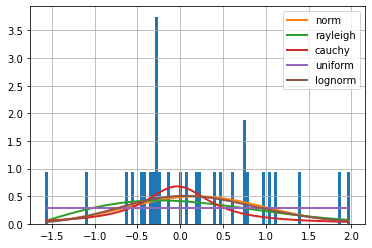

In [108]:
net.new_topology = [784, 800, 100, 10]
net.AG_update(1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

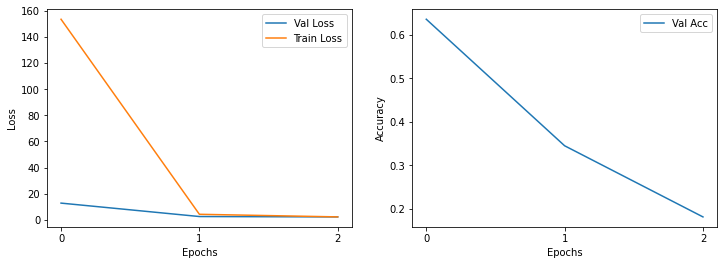

In [ ]:
plot_results(history)

### GA

In [ ]:
class GA():
  "Each cromosome represents a possible structure of a new NN"
#-------------------------------------------------------------------------------
  def __init__(self, main_fluid_net, sample_params, num_max_units, num_min_units, num_max_layers, num_min_layers,input_dim, output_dim):
    self.num_max_units = num_max_units
    self.num_min_units = num_min_units
    self.num_max_layers = num_max_layers
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.pop_layers = []
    self.n_pop = []
    self.best_fitness = []
    self.best_NN = []
    self.pop_net = [] # the diff among pop_layers and pop_net is that the last one also incluse opt weights
    self.pop_fitness = []
    self.num_min_layers = num_min_layers
    self.pop_initial()
    self.main_fluid_net = main_fluid_net
    self.sample_params = sample_params # % of params to be sample out of a predetermined distribution
#-------------------------------------------------------------------------------    
  def pop_initial(self):
    # n_pop = int(np.ceil((self.input_dim * 50) / (5 + self.input_dim)))
    n_pop = 3
    n_layers =  np.random.randint(low=self.num_min_layers, high=self.num_max_layers, size=n_pop)
    
    pop_layers = [] # Pop of differents NN
    for i in range(n_pop):
      num_units_layer = np.random.randint(low=self.num_min_units, high=self.num_max_units, size=n_layers[i])
      pop_layers.append(num_units_layer)

    self.pop_initial = pop_layers
    self.n_pop = len(self.pop_initial)
    self.pop_layers = pop_layers

    # return pop_layers
#-------------------------------------------------------------------------------
  def fitness(self, epochs):
    pop_fitness = []
    pop_net = []
    pop_layers = []
    sample_update = np.round(self.sample_params*self.n_pop, 0)
    j = 0 # to control sample udpate
    for i in range(self.n_pop):
      layers = self.pop_layers[i]
      if layers[0] != self.input_dim:
        layers = np.insert(layers, 0, self.input_dim)
      if layers[-1] != self.output_dim:
        layers = np.insert(layers, len(layers), self.output_dim)
      # Create de NN, starting from the previous step
      net = self.main_fluid_net
      net.new_topology = layers
      # Padding
      if j == sample_update:
        net.AG_update(1)
        j = 0 # start again
      else:
        net.AG_update(0) # 1: Sample distribution, 0: Normal initialization
      # Load data
      (x_train, y_train), (x_test, y_test) = load_data()
      # Training parameters
      batch_size = 120
      steps_per_epoch = int(x_train.shape[0]/batch_size)
      lr = 3e-3
      trigger = np.inf # to avoid an AG's trigger action
      # Training loop
      print(f'NN structure {i}/{self.n_pop}')
      history = net.train(x_train, y_train, x_test, y_test, epochs, steps_per_epoch,
        batch_size, lr, trigger)
      pop_fitness.append(history['val_acc'][-1])
      pop_net.append(net)
      pop_layers.append(layers)
      j +=1

    self.pop_layers = pop_layers
    self.pop_fitness = pop_fitness
    self.pop_net = pop_net 
    return pop_fitness
#-------------------------------------------------------------------------------
  def selection(self):
    pop_fitness =  self.pop_fitness
    # Although the fitness values (accuracy) are normalised, as they are compared 
    # with a random threshold between 0-1 we rather apply a min-max scaler.
    fitness_pu = np.asarray(pop_fitness)
    fitness_pu = (fitness_pu - fitness_pu.min()) / (fitness_pu.max() - fitness_pu.min()) 
    index = random.sample(range(len(fitness_pu)), len(fitness_pu))

    fathers_to_select = []
    j = 0
    while (len(fathers_to_select) < 2 and j < len(index)):
      i = index[j]
      threshold = np.random.random()
      if fitness_pu[i] > threshold:
        fathers_to_select.append(i)
      j +=1
    return fathers_to_select
#-------------------------------------------------------------------------------
  def crossover(self, crossover_rate, nchild): # Two children by each recombination
    threshold = np.random.random()
    if crossover_rate > threshold: # Then crossover operator is computed
      # Select crossover point that is not on the end of the string
      c = self.permutation(2) # number of children
      # Wrap up all children
      # c1, c2 = list(c.values())
      return c
    else:
      return []
#-------------------------------------------------------------------------------
  def permutation(self, nchild):
    c = {}
    fathers_to_select = self.selection()
    if len(fathers_to_select) < 2:
      return []
    else:
      p1 = self.pop_layers[fathers_to_select[0]]
      p2 = self.pop_layers[fathers_to_select[1]]
      w_dW1 = np.abs(self.compute_db_weight(fathers_to_select[0]))
      w_dW2 = np.abs(self.compute_db_weight(fathers_to_select[1]))
      for j in range(2):
        c[j] = []
        n = np.random.randint(self.num_min_layers, (np.max([len(p1), len(p2)]))) # child's length
        for i in range(n):
          if i < min([len(p1)-1, len(p2)-1]):
            idx = np.random.randint(1, np.min([len(p1)-1, len(p2)-1])) # -1 OJO
            aux = np.argmin([w_dW1[idx], w_dW2[idx]])
            if aux == 0:
              c[j].append(p1[idx])
            else:
              c[j].append(p2[idx])
          else:
            if len(p1) > len(p2):
              idx = np.random.randint(1, len(p1))
              c[j].append(p1[idx])
            else:
              idx = np.random.randint(1, len(p2))
              c[j].append(p2[idx])
      return c
#-------------------------------------------------------------------------------
  def mutation(self, mutation_rate):
    threshold = np.random.random()
    if threshold < mutation_rate:
       n_mut_pop = np.int(self.n_pop*mutation_rate)
       return np.random.randint(low=self.num_min_layers, high=self.num_max_layers, size=n_mut_pop)
    else:
       return []
#-------------------------------------------------------------------------------
  def generational_replacement(self): 
    next_pop = []
    i = 0
    next_pop.append(self.best_NN)
    while len(next_pop) < self.n_pop :
      aux1 = self.crossover(0.8, 2)
      aux2 = self.mutation(0.2)
      if len(aux1) != 0:
        aux1_0 = list(aux1.values())[0]
        aux1_1 = list(aux1.values())[1]
        next_pop.append(aux1_0)
        next_pop.append(aux1_1)
      if len(aux2) != 0:
        next_pop.append(list(aux2))
      i +=1
    self.pop_layers = next_pop
#-------------------------------------------------------------------------------
  def compute_db_weight(self, j):
    mean_dW = []
    net = self.pop_net[j]
    fitness = self.pop_fitness[j]
    for i in range(1, net.L):
      mean_dW.append(np.mean(net.dW[i]))
    return mean_dW/fitness
#-------------------------------------------------------------------------------
  def run_algo(self, n_stall_generations, max_iters):
     # Parameters' initialization
     self.best_fitness = 0
     stall_generations = 0
     iters = 0
     # While-loop to find the optimal parameters
     while stall_generations < n_stall_generations or iters < max_iters:
       iters += 1
       pop_fitness = self.fitness(3)
       if self.best_fitness < max(pop_fitness):
         self.best_fitness = max(pop_fitness)
         max_index = pop_fitness.index(self.best_fitness)
         self.best_NN = self.pop_net[max_index]
         stall_generations = 0
         print(f'Iter {iters}.The best NN has an accuracy of {self.best_fitness }')
       else:
         stall_generations += 1
         print(f'Iter {iters}.No improvement')

       self.generational_replacement()
     return self.best_NN
    

In [ ]:
num_max_units = 128
num_min_units = 10
num_max_layers = 5
num_min_layers = 2
input_dim = 28*28
output_dim = 10
sample_update = 0.1

In [ ]:
algo = GA(net, sample_update, num_max_units, num_min_units, num_max_layers, num_min_layers, input_dim, output_dim)

In [ ]:
algo.run_algo(1, 1)

NN structure 0/3
Epoch0...........Val acc: 0.1021
Epoch1...........Val acc: 0.1015
Epoch2...........Val acc: 0.1014
NN structure 1/3
Epoch0...........Val acc: 0.1012
Epoch1...........Val acc: 0.1009
Epoch2...........Val acc: 0.101
NN structure 2/3
Epoch0...........Val acc: 0.1103
Epoch1...........Val acc: 0.1161
Epoch2...........Val acc: 0.1202
Iter 1.The best NN has an accuracy of 0.1202


## Samplear distribucion de pesos

In [ ]:
def sample_distribution(param, layer, shape):
  'Param: W (1) /b (0), layer: number of weight, size: tensor shape'
  # Find best distribution to fit in dataset
  if param == 1:
    dataset = pd.DataFrame(net.W[layer].numpy())
  else:
    dataset = pd.DataFrame(net.b[layer].numpy())

  f = Fitter(dataset,distributions= get_common_distributions()) # only common distribution out of the 80 are tested
  f.fit()
  summary = pd.DataFrame(f.summary(method='bic')) 
  dist_name = summary['bic'].keys()[0] # best dist according to bic values
  # best_params = list(f.get_best(method='bic').values())[0] # best params 
  best_params = f.fitted_param[dist_name]
  # Invoke distribution object
  tfd = tfp.distributions
  # Switch-case sentence
  if dist_name == 'cauchy':
    return tfd.Cauchy(loc=best_params[0], scale=best_params[1]).sample(shape)
  elif dist_name == 'chi2':
    return tfd.Chi2(best_params[0]).sample(shape)
  elif dist_name == 'expon':
    return tfd.Exponential(np.abs(best_params[0])).sample(shape)
  elif dist_name == 'exponpow':
    return tfd.ExponentiallyModifiedGaussian(loc=best_params[0],
                                             scale=best_params[1],
                                             rate=best_params[2]).sample(shape)
  elif dist_name == 'gamma':
    return tfd.Gamma(concentration==best_params[0], rate=best_params[1],
                                          log_rate=best_params[2]).sample(shape)
  elif dist_name == 'lognorm':
    return tfd.LogNormal(loc=best_params[0], scale=best_params[1]).sample(shape)
  elif dist_name == 'norm':
    return tfd.Normal(loc=best_params[0], scale=best_params[1]).sample(shape)
  elif dist_name == 'powerlaw': # Its not defined
    return tfd.Normal(loc=best_params[0], scale=best_params[1]).sample(shape)
  elif dist_name == 'rayleigh':
    return tfp.random.rayleigh(loc=best_params[0], scale=best_params[1]).sample(shape)
  else: # uniform
    return tfd.Uniform(low=best_params[0], high=best_params[1]).sample(shape)

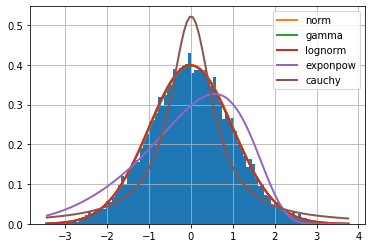

In [ ]:
sample_distriibution(1, 3, (3,1))